### Setting up the invironment

In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (OneHotEncoder, FunctionTransformer, OrdinalEncoder, MinMaxScaler)
from sklearn.impute import KNNImputer
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import re
import os

In [504]:
import warnings

warnings.filterwarnings(action = 'ignore')

### Reading and merging the data

##### Batch1

In [505]:
path = os.path.join(os.getcwd(),'Train_Batch_1.csv')
train1 = pd.read_csv(path)
train1.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650


In [506]:
# renaming columns for easier access
train1.columns = train1.columns.str.lower().str.strip().str.replace(' ', '_')


# extracting gross and net weights 
def extract_weights(text):
    weights = re.sub(r"[a-z A-Z :{}']", '', text).split(',')
    return weights[0], weights[1]

train1[['gross_weight','net_weight']] = train1['product_weights_data_in_(kg)'].apply(extract_weights).tolist()

# droping the old column
train1 = train1.drop('product_weights_data_in_(kg)', axis = 1)

# renaming columns to match the other patches
train1.rename({'min._yearly_income': 'yearly_income'}, axis = 1, inplace = True)

##### Batch2

In [507]:
path = os.path.join(os.getcwd(),'Train_Batch_2.csv')
train2 = pd.read_csv(path)
train2.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884


In [508]:
# renaming columns for easier access
train2.columns = train2.columns.str.lower().str.strip().str.replace(' ', '_')

# renaming columns to match the other patches
train2.rename({'min._person_yearly_income': 'yearly_income'}, axis = 1, inplace = True)

##### Batch3

In [509]:
path = os.path.join(os.getcwd(),'Train_Batch_3.csv')
train3 = pd.read_csv(path)
train3.head(2)

,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411


In [510]:
# renaming columns for easier access
train3.columns = train3.columns.str.lower().str.strip().str.replace('%20', '_').str.replace(' ', '_')

# extracting gross and net weights 
train3[['gross_weight','net_weight']] = train3['weights_data'].apply(extract_weights).tolist()

# droping the old column
train3 = train3.drop('weights_data', axis = 1)

##### concatinating

In [511]:
df= df = pd.concat([train1, train2, train3], ignore_index= True)
df.head(2)

,unnamed:_0,person_description,place_code,customer_order,additional_features_in_market,promotion_name,store_kind,store_sales,store_cost,is_recyclable?,yearly_income,store_area,grocery_area,frozen_area,meat_area,cost,gross_weight,net_weight
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,recyclable,10K+,2842.23,2037.64,481.98,323,602.7575,28.1997,26.6008
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650,16.571,14.972


### Data Cleaning

##### Exploration

In [512]:
df.shape

(38862, 18)

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38862 entries, 0 to 38861
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     38862 non-null  object 
 1   person_description             38862 non-null  object 
 2   place_code                     38862 non-null  object 
 3   customer_order                 38860 non-null  object 
 4   additional_features_in_market  34562 non-null  object 
 5   promotion_name                 33034 non-null  object 
 6   store_kind                     33053 non-null  object 
 7   store_sales                    38847 non-null  object 
 8   store_cost                     38855 non-null  object 
 9   is_recyclable?                 38860 non-null  object 
 10  yearly_income                  38854 non-null  object 
 11  store_area                     35297 non-null  object 
 12  grocery_area                   35256 non-null 

##### sales, yearly_income and store_sales

In [514]:
def sales_cost_income(X):

  df = X.copy()

  columns= ['store_cost', 'yearly_income', 'store_sales']


  # extracting the numeric part
  for col in columns:
    df[col] = df[col].str.strip('MillionsMK+. ')

  # changing the datatype to numeric
  df[columns]= df[columns].astype('float')

  # imputing missing value
  modes = df[columns].apply(lambda x : x.mode()[0])
  df[columns] = df[columns].fillna(modes)

  return df

In [515]:
data = df.copy()
data = sales_cost_income(data)

data[['store_cost', 'yearly_income', 'store_sales']].head()

,store_cost,yearly_income,store_sales
0,4.2924,10.0,8.76
1,1.9716,50.0,6.36
2,4.4526,30.0,10.86
3,0.6732,30.0,1.98
4,4.9708,50.0,11.56


##### person description

In [516]:
def clean_person_description(X):

  df= X.copy()

  # extracting features from person description
  def extracting_person_info(text):
      return text.split()[0], text.split()[1], text.split()[3], text.split(': ')[1].split(' working')[0], text.split(' as ')[1]

  df[['marital_status', 'gender', 'num_children', 'education', 'work_type']] = df['person_description'].apply(extracting_person_info).tolist()
  
  # extracting number of childern
  number_mapping = { 'No':0, 'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}
  df['num_children'] = df['num_children'].map(number_mapping)

  # dropping the original column
  df = df.drop('person_description', axis= 1)

  return df

In [517]:
data = clean_person_description(data)

data[['marital_status', 'gender', 'num_children', 'education', 'work_type']].head()

,marital_status,gender,num_children,education,work_type
0,Single,Female,4,bachelors degree,professional
1,Single,Female,3,bachelors degree,management
2,Married,Male,2,high school degree,skilled manual
3,Single,Female,3,partial college,professional
4,Married,Female,5,bachelors degree,professional


##### customer order

In [518]:
def clean_customer_order(X):

  df= X.copy()
  # extracting features from customer order
  def extracting_order_info(text):
      if isinstance(text, str):
          return text.split(' from')[0], text.split('from ')[1].split(' department')[0], text.split(' : ')[1]
      else:
          return None, None, None

  df[['product_type', 'department', 'brand']] = df['customer_order'].apply(extracting_order_info).tolist()

  # removing the original column
  df = df.drop('customer_order', axis=1)

  return df

In [519]:
data = clean_customer_order(data)

data[['product_type', 'department', 'brand']].head()

,product_type,department,brand
0,Cleaning Supplies,Household,Red Wing
1,Snack Foods,Snack Foods,Nationeel
2,Magazines,Periodicals,Excel
3,Dairy,Dairy,Carlson
4,Vegetables,Produce,Hermanos


##### additional_features

In [520]:
def clean_features(X):

  df=X.copy()

  # imputing missing values
  col = 'additional_features_in_market'
  df[col] = df[col].fillna(  df[col].mode()[0])

  # List of categories
  categories = ['Video Store', 'Florist', 'Ready Food', 'Coffee Bar', 'Bar For Salad']

  for cat in categories:
    df[cat] = df[col].apply(lambda x: 1 if cat in x else 0)

  # Drop the original column
  df = df.drop( col, axis=1)

  #  fixing columns naming
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

  return df

In [521]:
data = clean_features(data)

data[['video_store', 'florist', 'ready_food', 'coffee_bar', 'bar_for_salad']].head()

,video_store,florist,ready_food,coffee_bar,bar_for_salad
0,1,1,1,1,1
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,1,1,1,1,1


##### place_code

In [522]:
def Place_code(X):
   df = X.copy()
   
   df['city_code'] = df['place_code'].apply(lambda x : x.split('_')[1])
   df['place_code'] = df['place_code'].apply(lambda x : x.split('_')[0])

   return df

In [523]:
data = Place_code(data)

data[['place_code', 'city_code']].head()

,place_code,city_code
0,H11go,ZA
1,S04ne,WA
2,L05es,CA
3,S03le,WA
4,M10da,YU


##### is_recyclable

In [524]:
def cleaning_recyclable(X):
  df = X.copy()

  # maping is_recyclable to a suitable value
  map_dict = {'recyclable': 1, 'non recyclable': 0, 'yes': 1, 'no': 0}
  df['is_recyclable?'] =  df['is_recyclable?'].map(map_dict)

  return df

In [525]:
data = cleaning_recyclable(data)

data['is_recyclable?'].head()

0    1.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: is_recyclable?, dtype: float64

##### dropping useless columns

In [526]:
def drop_columns(X, columns):

  df = X.copy()

  # removing columns
  df = df.drop(columns, axis=1)

  return df

In [527]:
data = drop_columns(data, ['unnamed:_0'])

data.columns

Index(['place_code', 'promotion_name', 'store_kind', 'store_sales',
       'store_cost', 'is_recyclable?', 'yearly_income', 'store_area',
       'grocery_area', 'frozen_area', 'meat_area', 'cost', 'gross_weight',
       'net_weight', 'marital_status', 'gender', 'num_children', 'education',
       'work_type', 'product_type', 'department', 'brand', 'video_store',
       'florist', 'ready_food', 'coffee_bar', 'bar_for_salad', 'city_code'],
      dtype='object')

##### Imputing missing values

In [528]:
data.isna().sum()/ data.shape[0] *100

place_code         0.000000
promotion_name    14.996655
store_kind        14.947764
store_sales        0.000000
store_cost         0.000000
is_recyclable?     0.005146
yearly_income      0.000000
store_area         9.173486
grocery_area       9.278987
frozen_area        9.140034
meat_area          9.132314
cost               0.079769
gross_weight       4.997169
net_weight         4.986877
marital_status     0.000000
gender             0.000000
num_children       0.000000
education          0.000000
work_type          0.000000
product_type       0.005146
department         0.005146
brand              0.005146
video_store        0.000000
florist            0.000000
ready_food         0.000000
coffee_bar         0.000000
bar_for_salad      0.000000
city_code          0.000000
dtype: float64

In [529]:
def Imputation(X):
    df = X.copy()

    # droping rows if the column has too few missing values (less than 1%)
    cols = df.loc[:, (df.isna().sum()/df.shape[0] *100 < 1)].columns
    df = df.dropna(subset= cols)

    # fixing the data types first
    num_cols = ['store_cost', 'yearly_income', 'grocery_area', 'meat_area', 'cost', 'store_area', 'frozen_area']
    df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
    
    # drpping missing rows of target variable
    df = df.dropna(subset= ['cost'])
    
    # imouting numeric columns
    cols = ['net_weight', 'gross_weight', 'meat_area', 'grocery_area', 'store_area', 'frozen_area']
    knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors as needed
    df[cols] = knn_imputer.fit_transform(df[cols])
    # imputing categorical columna
    cols = ['promotion_name', 'store_kind']
    modes = df[cols].apply(lambda x : x.mode()[0])
    df[cols] = df[cols].fillna(modes)

    return df

In [533]:
data = Imputation(data)

data.isna().sum().sum()

0

##### removing duplicates

In [534]:
def remove_duplicates(X):
    df = X.copy()
    # removing duplicates
    df = df.drop_duplicates()
    return df

### Exploratory Data Analysis

#### Univariate Analysis

##### Numeric columns

In [580]:
def plot_kde_for_numeric_columns(df):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    numeric_columns = [column for column in numeric_columns if (df[column].nunique()> 6)]

    # Set up the figure for subplots
    plt.figure(figsize=(8, len(numeric_columns) * 3))

    # Loop through each numeric column and plot its KDE
    for i, column in enumerate(numeric_columns):
            plt.subplot(len(numeric_columns), 1, i + 1)  # Create subplots
            sns.kdeplot(df[column].dropna(), shade=True, color='#92a78a')  # Plot KDE (drop NaN values)
            plt.title(f'KDE Plot for {column}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Density', fontsize=12)

    plt.tight_layout() 
    plt.show()

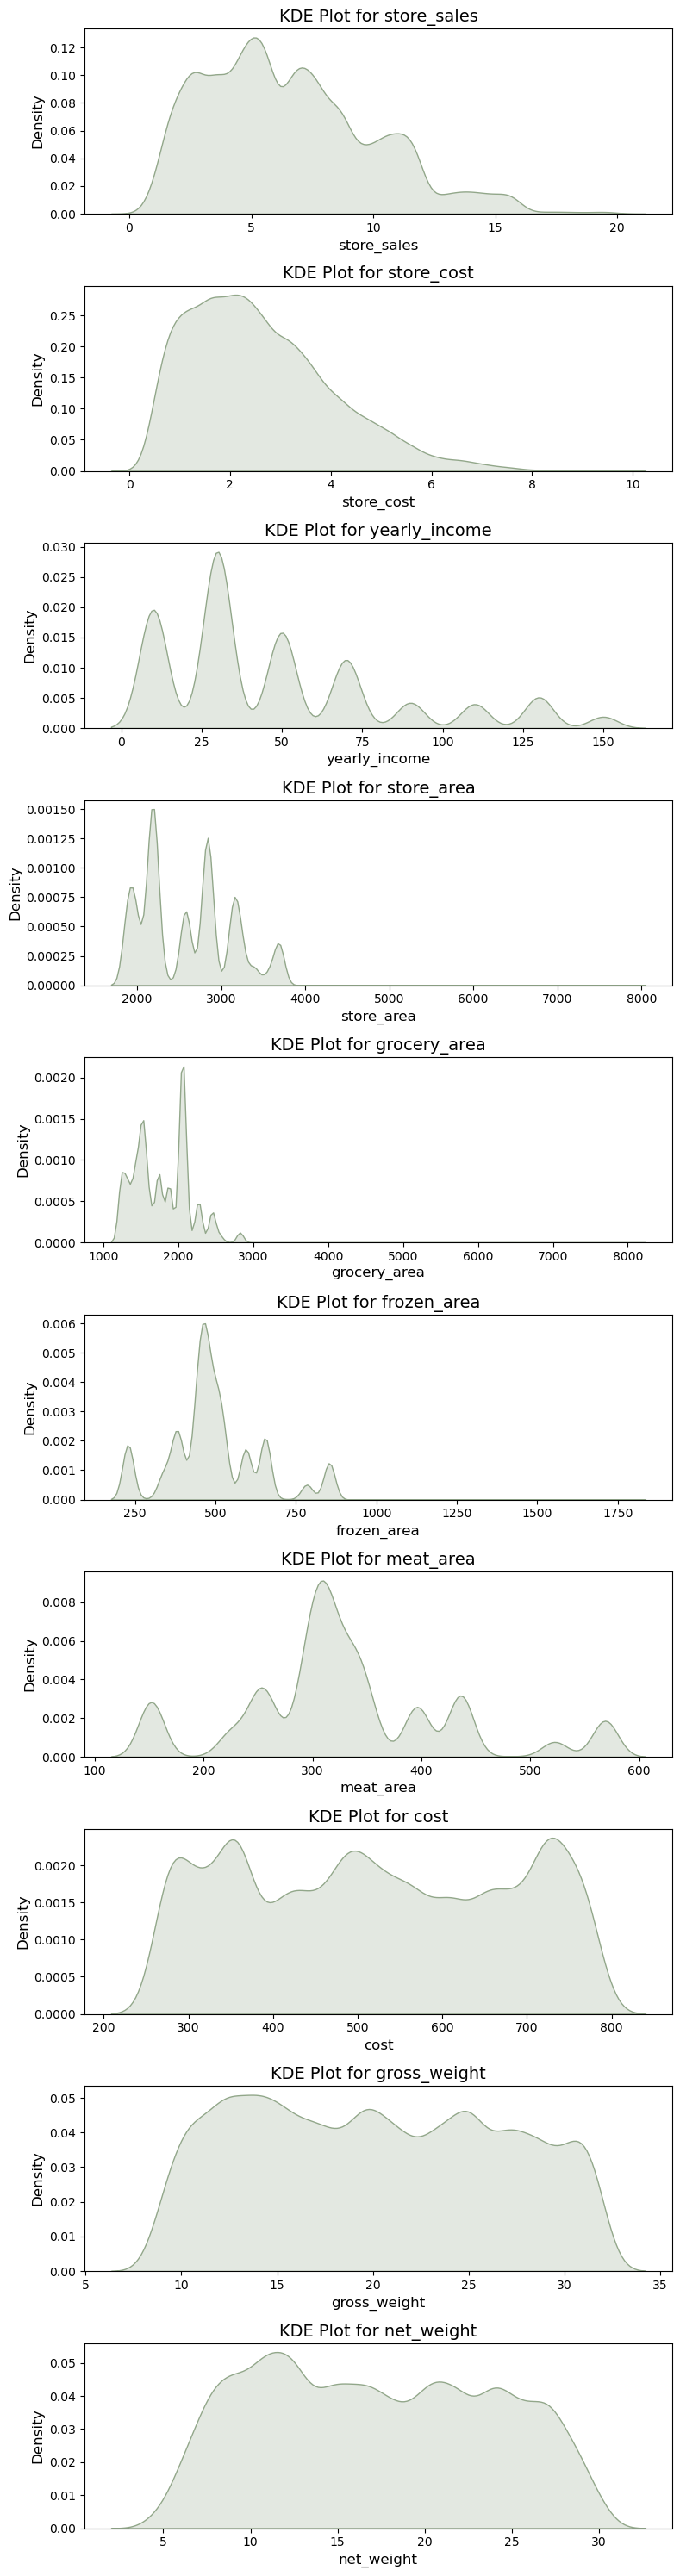

In [581]:
plot_kde_for_numeric_columns(data)

##### Categorical columns

In [578]:
def plot_bar_for_categorical_columns(df):
    # Select only categorical columns with less than 15 unique values
    cat_columns = df.select_dtypes(include=['object', 'category']).columns
    cat_columns = [column for column in cat_columns if df[column].nunique() < 15]

    # Set up the figure for subplots
    plt.figure(figsize=(6, len(cat_columns) * 3))

    # Loop through each categorical column and plot its bar plot
    for i, column in enumerate(cat_columns):
        plt.subplot(len(cat_columns), 1, i + 1)  # Create subplots
        sns.countplot(data=df, x=column, color='#92a78a')  # Plot bar plot (count of each category)
        plt.title(f'Bar Plot for {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)

    plt.tight_layout()  # Adjust subplots for better layout
    plt.show()

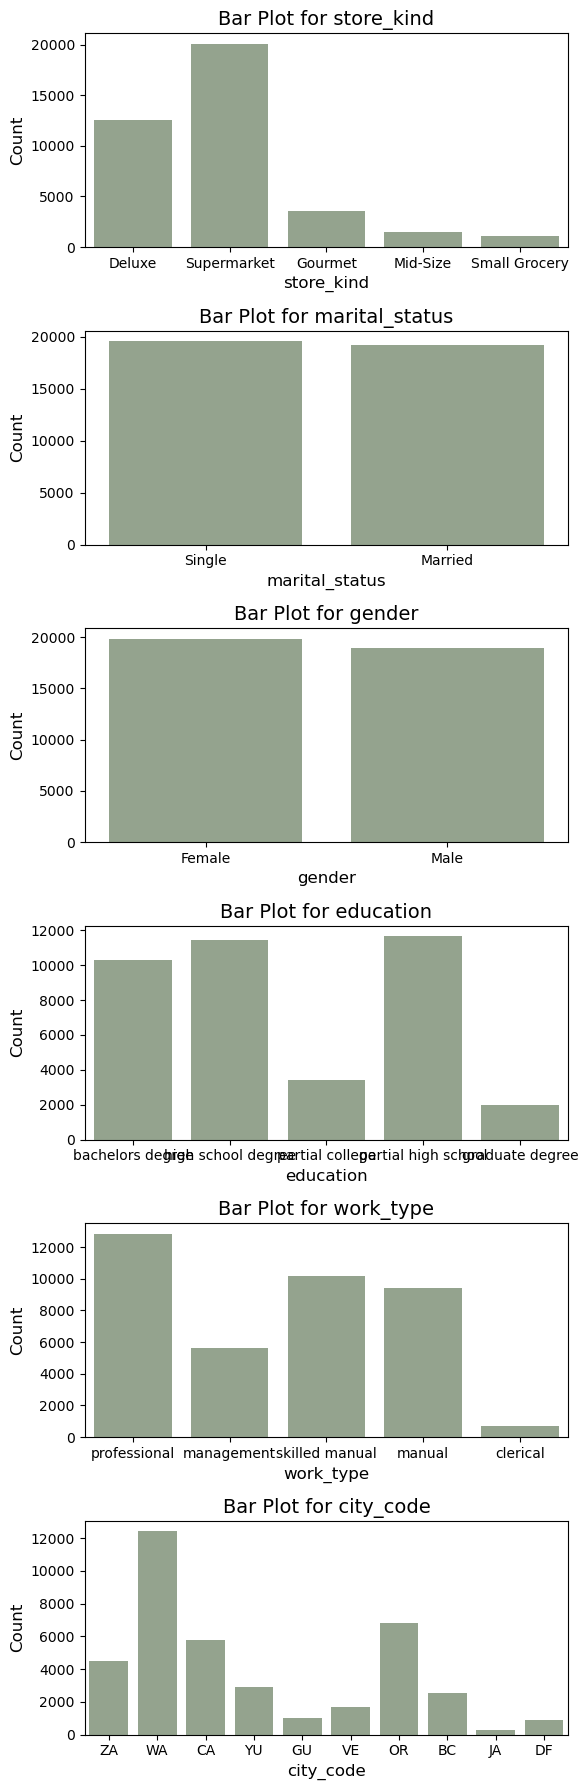

In [579]:
plot_bar_for_categorical_columns(data)

#### multivarite analysis

##### Q: most common recyclable products

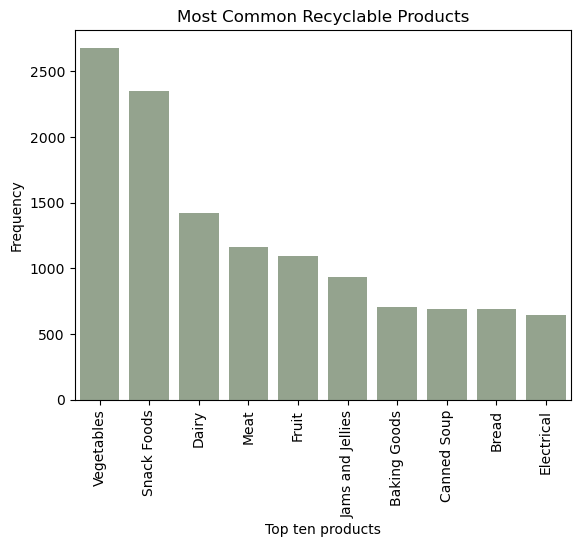

In [547]:
top_ten = data.loc[data['is_recyclable?'] == 1, 'product_type'].value_counts(ascending= False)[0:10].index.tolist()
count = data.loc[data['is_recyclable?'] == 1, 'product_type'].value_counts(ascending= False)[0:10].values.tolist()

sns.barplot(x = top_ten, y= count, color= '#92a78a')
plt.xticks(rotation = 90)
plt.xlabel('Top ten products')
plt.ylabel('Frequency')
plt.title('Most Common Recyclable Products')
plt.show()

##### Q: most expensive cities

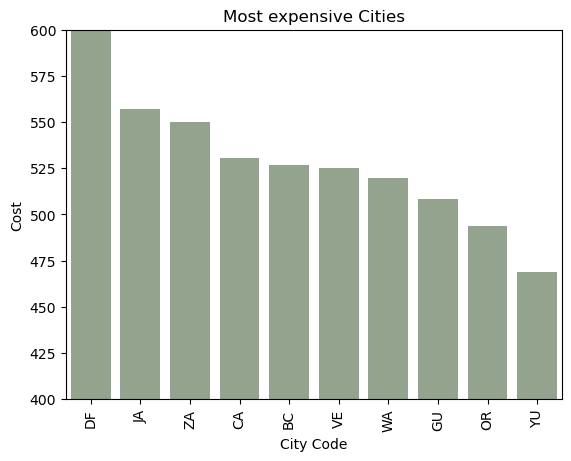

In [548]:
costs = data.groupby('city_code').agg({'cost' : 'mean'})['cost'].sort_values(ascending= False).values[:10]
brands = data.groupby('city_code').agg({'cost' : 'mean'})['cost'].sort_values(ascending= False).index[:10]

sns.barplot(x = brands , y= costs, color = '#92a78a')
plt.xticks(rotation = 90)
plt.ylim(400,600)
plt.xlabel('City Code')
plt.ylabel('Cost')
plt.title('Most expensive Cities')
plt.show()

##### Q: most expensive brands

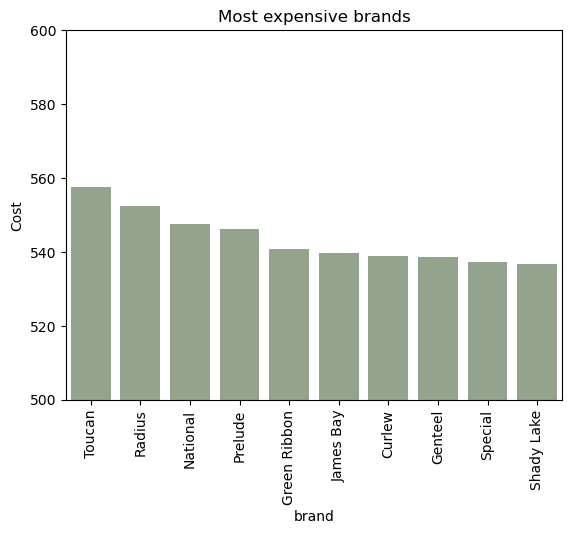

In [549]:
costs = data.groupby('brand').agg({'cost' : 'mean'})['cost'].sort_values(ascending= False).values[:10]
brands = data.groupby('brand').agg({'cost' : 'mean'})['cost'].sort_values(ascending= False).index[:10]

sns.barplot(x = brands , y= costs, color = '#92a78a')
plt.xticks(rotation = 90)
plt.ylim(500,600)
plt.xlabel('brand')
plt.ylabel('Cost')
plt.title('Most expensive brands')
plt.show()


##### Q: Is there a relation between work_type and cost

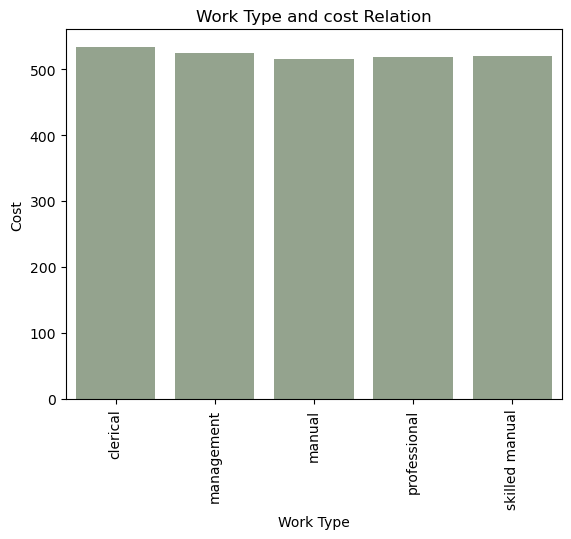

In [550]:
costs = data.groupby('work_type').agg({'cost': 'mean'})

sns.barplot(x = costs.index, y= costs['cost'], color = '#92a78a')
plt.xticks(rotation = 90)
plt.xlabel('Work Type')
plt.ylabel('Cost')
plt.title('Work Type and cost Relation')
plt.show()



##### Q: Is there a relation between the education and cost

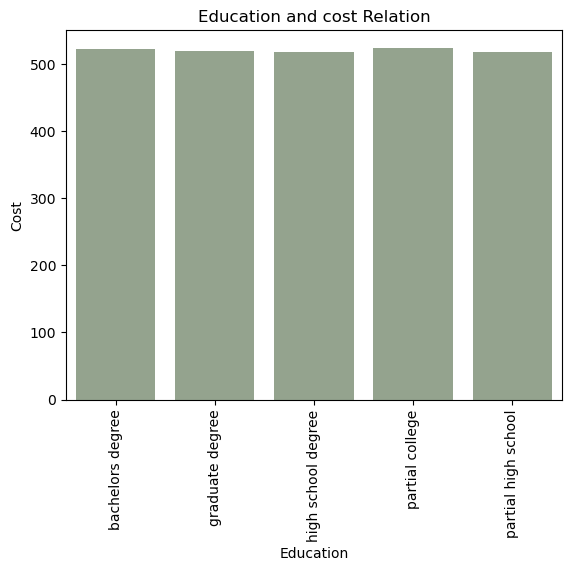

In [551]:
costs = data.groupby('education').agg({'cost': 'mean'})

sns.barplot(x = costs.index, y= costs['cost'], color = '#92a78a')
plt.xticks(rotation = 90)
plt.xlabel('Education')
plt.ylabel('Cost')
plt.title('Education and cost Relation')
plt.show()



##### Q: Is there a relationship between the store_area and the product cost

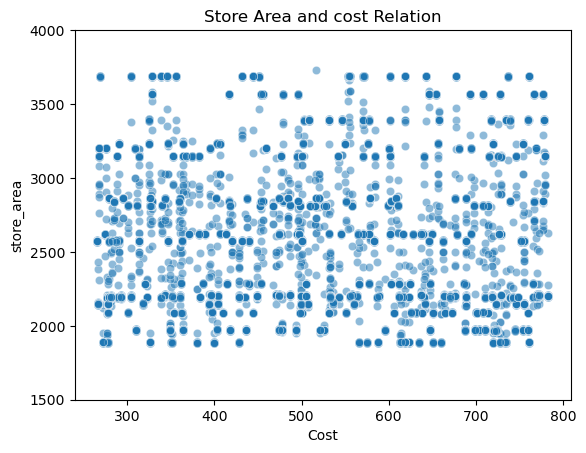

In [552]:
sns.scatterplot(data= data, x = 'cost', y= 'store_area', alpha = 0.5)
plt.ylim(1500,4000)
plt.xlabel('Cost')
plt.ylabel('store_area')
plt.title('Store Area and cost Relation')
plt.show()

#### multicolinearity

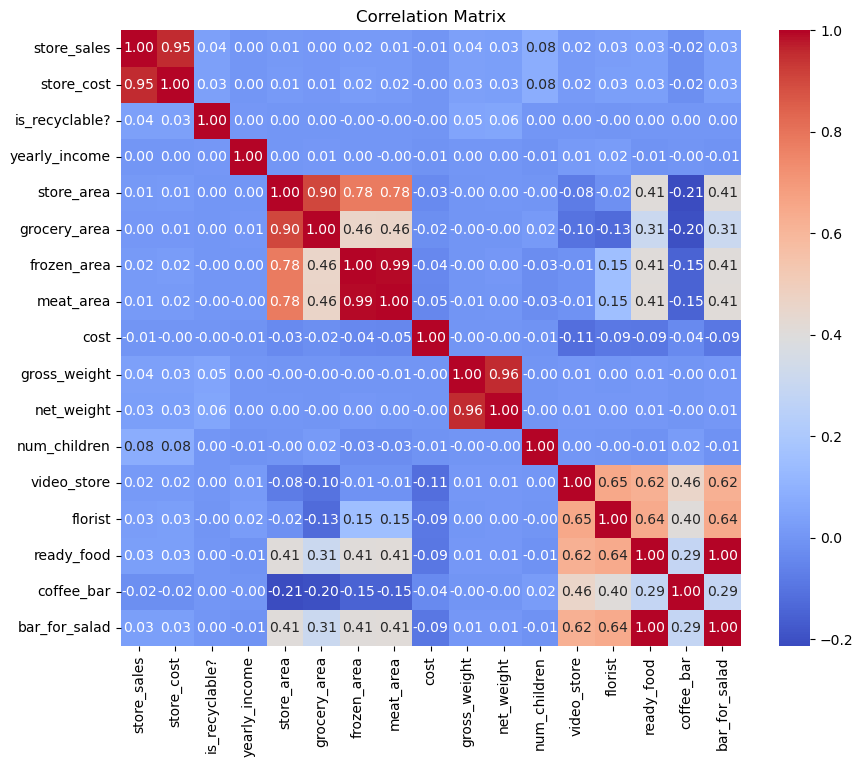

In [543]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Preprocessing

##### encoding

In [ ]:
def encoding_columns(X):
    df = X.copy()

    # ordinal --> ['place_code', 'promotion_name', 'product_type', 'department', 'brand', 'city_code' 'work_type'] 
    cols = ['product_type', 'department', 'brand', 'gender', 'store_kind','marital_status', 'city_code'] 
    encoder = OrdinalEncoder()
    df[cols] = encoder.fit_transform(df[cols])

    # onehot --> ['gender', 'work_type', 'store_kind']
    cols = ['promotion_name', 'place_code']          
    encoder = OneHotEncoder(drop='first', sparse_output= False)  
    encoded = encoder.fit_transform(df[cols])                     
    feature_names = encoder.get_feature_names_out(cols)
    df[feature_names] = encoded

    # droping the original column
    df = df.drop(cols, axis = 1)
    return df


In [443]:
data = encoding_columns(data)

data.head(2)

,store_kind,store_sales,store_cost,is_recyclable?,yearly_income,store_area,grocery_area,frozen_area,meat_area,cost,...,place_code_M12ty,place_code_O09ba,place_code_P07nd,place_code_S01em,place_code_S03le,place_code_S04ne,place_code_S18co,place_code_T02ma,place_code_V13er,place_code_V19ia
0,0.0,8.76,4.2924,1.0,10.0,2842.23,2037.64,481.98,323.00,602.7575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,6.36,1.9716,0.0,50.0,2814.95,2049.72,457.36,313.55,708.6650,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##### scaling

In [374]:
def scaling_nums(X):
  df = X.copy()

  # using min max scaler to scale numer columns
  cols = [ 'store_cost', 'yearly_income', 'grocery_area', 'meat_area', 'gross_weight', 'net_weight']
  scaler = MinMaxScaler(feature_range = (0,1))
  df[cols] = scaler.fit_transform(df[cols])
  
  return df

In [375]:
data = scaling_nums(data)

data.head(2)

,store_kind,store_sales,store_cost,is_recyclable?,yearly_income,store_area,grocery_area,frozen_area,meat_area,cost,...,place_code_M12ty,place_code_O09ba,place_code_P07nd,place_code_S01em,place_code_S03le,place_code_S04ne,place_code_S18co,place_code_T02ma,place_code_V13er,place_code_V19ia
0,0.0,8.76,0.431776,1.0,0.000000,2842.23,0.117110,481.98,0.411320,602.7575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,6.36,0.189098,0.0,0.285714,2814.95,0.118868,457.36,0.388865,708.6650,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Pipeline

In [444]:
def full_cleaning(X):

  df = X.copy()

  df = sales_cost_income(df)

  df = clean_person_description(df)

  df = clean_customer_order(df)

  df = clean_features(df)

  df = Place_code(df)

  df = cleaning_recyclable(df)

  df = Imputation(df)


  df = drop_columns(df, ['unnamed:_0', 'frozen_area', 'store_sales', 'store_area', 'work_type', 'education'])

  df = remove_duplicates(df)

  df = encoding_columns(df)

  df = scaling_nums(df)


  return df

In [445]:
Full_Cleaning = FunctionTransformer(full_cleaning)

# applying the pipeline on the data
df = Full_Cleaning.fit_transform(df)

# removing the target variable
X = df.drop('cost', axis= 1)
y = df['cost']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, shuffle= True)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape} \nX_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (31055, 86), y_train shape: (31055,) 
X_test shape: (7764, 86), y_test shape: (7764,)


### modeling

In [446]:
def modelling (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # predicting on the train data
    yt_pred = model.predict(X_train)
    print('RMSE on tain data: ', np.sqrt(mean_squared_error(yt_pred, y_train)))
    # predicting on the test data
    y_pred = model.predict(X_test)
    print('RMSE on test data: ', np.sqrt(mean_squared_error(y_pred, y_test)))

    return model

##### LinearRegression

In [447]:
model = LinearRegression()
LR = modelling(model, X_train, y_train, X_test, y_test)

RMSE on tain data:  134.41967242364908
RMSE on test data:  135.1180641433419


##### Ridge

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

print(f"Optimal Alpha: {ridge_cv.alpha_}")

Optimal Alpha: 1.0


In [ ]:
model = Ridge(alpha= 1.0)
Rdg = modelling(model, X_train, y_train, X_test, y_test)

RMSE on tain data:  134.39312285766812
RMSE on test data:  135.14849703429007


##### Lasso

In [ ]:
model = Lasso(alpha=0.002)
Rdg = modelling(model, X_train, y_train, X_test, y_test)

RMSE on tain data:  134.39190261634883
RMSE on test data:  135.14141282488677


##### Random forest

In [ ]:
model = RandomForestRegressor(n_estimators= 150)
RF = modelling(model, X_train, y_train, X_test, y_test)

RMSE on tain data:  29.07300144452221
RMSE on test data:  79.4493657469115


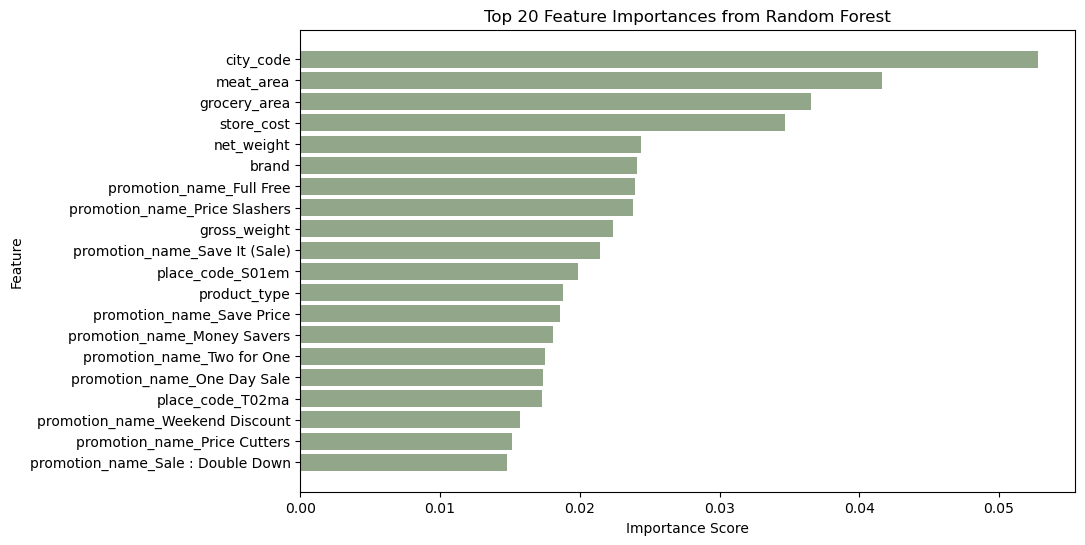

In [383]:
# Get feature importances from the Random Forest model
importances = RF.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Select top 20 features
top_n = 20
top_indices = indices[:top_n]

# Plot top 20 features
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[top_indices], align="center", color='#92a78a')
plt.yticks(range(top_n), [X.columns[i] for i in top_indices])
plt.title('Top 20 Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

##### ExtraTrees

In [ ]:
model = ExtraTreesRegressor(
    n_estimators=250,
    max_depth=None,
    max_features="auto", 
    bootstrap=True,
    random_state=42
)

EXT = modelling(model,X_train,y_train, X_test, y_test)

RMSE on tain data:  28.154688404529914
RMSE on test data:  77.22832621961983


### ExtraTrees is our best algoritm 

In [ ]:
# retraining with the full dataset
EXT = EXT.fit(X, y)